<center><h1>Yu-Hsuan Lu_HW4</h1></center>
<br>
<br>

Name: Yu-Hsuan Lu
<br>
Github Username: @YuHsuan-Lu
<br>
USC ID: 6849388612

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import csv
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_context(rc={"axes.tight_layout": False})
warnings.filterwarnings("ignore", message="The figure layout has changed to tight", category=UserWarning)
warnings.filterwarnings("ignore")
from IPython.display import Image

Get the AReM Data Set

In [2]:
test = []
train = []
# Specify the parent folder path
root = '../data/AReM'

# List the items (files and directories) in the parent folder
folders = os.listdir(root)

# Iterate through the items and filter out directories
for f in folders:
    f_path = os.path.join(root,f)  # Full path to the item   
    # Check if the item is a directory
    if os.path.isdir(f_path):
        if f == 'bending1' or f == 'bending2':
            for file in os.listdir(f_path):
                file_path = os.path.join(f_path,file)
                if file == 'dataset1.csv' or file == 'dataset2.csv':
                    test.append(file_path)
                else:
                    train.append(file_path)
        else:
            for file in os.listdir(f_path):
                file_path = os.path.join(f_path,file)
                if file == 'dataset1.csv' or file == 'dataset2.csv'or file == 'dataset3.csv':
                    test.append(file_path)
                else:
                    train.append(file_path)

### (b) Splitting Data

In [3]:
train

['../data/AReM\\bending1\\dataset3.csv',
 '../data/AReM\\bending1\\dataset4.csv',
 '../data/AReM\\bending1\\dataset5.csv',
 '../data/AReM\\bending1\\dataset6.csv',
 '../data/AReM\\bending1\\dataset7.csv',
 '../data/AReM\\bending2\\dataset3.csv',
 '../data/AReM\\bending2\\dataset4.csv',
 '../data/AReM\\bending2\\dataset5.csv',
 '../data/AReM\\bending2\\dataset6.csv',
 '../data/AReM\\cycling\\dataset10.csv',
 '../data/AReM\\cycling\\dataset11.csv',
 '../data/AReM\\cycling\\dataset12.csv',
 '../data/AReM\\cycling\\dataset13.csv',
 '../data/AReM\\cycling\\dataset14.csv',
 '../data/AReM\\cycling\\dataset15.csv',
 '../data/AReM\\cycling\\dataset4.csv',
 '../data/AReM\\cycling\\dataset5.csv',
 '../data/AReM\\cycling\\dataset6.csv',
 '../data/AReM\\cycling\\dataset7.csv',
 '../data/AReM\\cycling\\dataset8.csv',
 '../data/AReM\\cycling\\dataset9.csv',
 '../data/AReM\\lying\\dataset10.csv',
 '../data/AReM\\lying\\dataset11.csv',
 '../data/AReM\\lying\\dataset12.csv',
 '../data/AReM\\lying\\datas

In [4]:
test

['../data/AReM\\bending1\\dataset1.csv',
 '../data/AReM\\bending1\\dataset2.csv',
 '../data/AReM\\bending2\\dataset1.csv',
 '../data/AReM\\bending2\\dataset2.csv',
 '../data/AReM\\cycling\\dataset1.csv',
 '../data/AReM\\cycling\\dataset2.csv',
 '../data/AReM\\cycling\\dataset3.csv',
 '../data/AReM\\lying\\dataset1.csv',
 '../data/AReM\\lying\\dataset2.csv',
 '../data/AReM\\lying\\dataset3.csv',
 '../data/AReM\\sitting\\dataset1.csv',
 '../data/AReM\\sitting\\dataset2.csv',
 '../data/AReM\\sitting\\dataset3.csv',
 '../data/AReM\\standing\\dataset1.csv',
 '../data/AReM\\standing\\dataset2.csv',
 '../data/AReM\\standing\\dataset3.csv',
 '../data/AReM\\walking\\dataset1.csv',
 '../data/AReM\\walking\\dataset2.csv',
 '../data/AReM\\walking\\dataset3.csv']

### (c) Feature Extraction

#### i. Research

#### ii. Extraction

In [5]:
COLUMN_NAMES = ["# Columns: time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
STATS = ['min', 'max', 'mean', 'median', 'std', '1st_quartile', '3rd_quartile']

In [6]:
def get_columns():
    feature = []
    for i in range(1, 7):
        for stat in STATS:
            feature.append(f'{stat}{i}')
    return feature
# def break_timeseries(df, segs):
#     seg_length = int(df.shape[0] / segs)
#     sst_after_break  = []
#     every_piece = []
#     for i in range(segs):
#         start = i * seg_length
#         end = min((i + 1) * seg_length, df.shape[0])
#         cur_piece = df[start : end]
#         cur_piece = cur_piece.describe().drop('count').drop(columns="# Columns: time").T
#         every_piece.append(cur_piece.values.flatten())

#     sst_after_break.append(np.concatenate(every_piece))
#     #print(sst_after_break)
#     return sst_after_break
def load_and_get_sst(files, feature, cols):    
    instances  = []
    labels = []
    for f in files:
        move_label = os.path.basename(os.path.dirname(f))
        labels.append(move_label)
        
        delimiter = csv.Sniffer().sniff(open(f).read()).delimiter
        if delimiter == ",":
            fc = pd.read_csv(f, skiprows=5, header=None, on_bad_lines='skip')
        else:
            fc = pd.read_csv(f, skiprows=5, sep="\\s+", header=None, on_bad_lines='skip')
            
        fc.columns = COLUMN_NAMES

        sst = []
        
        cur_seg = fc[0 : fc.shape[0]]
        cur_describe = cur_seg.describe().drop('count').drop(columns="# Columns: time").T
        sst.append(cur_describe.values.flatten())
        instances.append(np.concatenate(sst))

    sst_df = pd.DataFrame(instances, columns=get_columns())[feature]
    sst_df['label'] = pd.Series(labels)
    
    return sst_df


feature = [f'{stat}{i}' for i in range(1, 7) for stat in STATS]
train_data = load_and_get_sst(train, feature, COLUMN_NAMES)
test_data = load_and_get_sst(test, feature, COLUMN_NAMES)

train_data

,min1,max1,mean1,median1,std1,1st_quartile1,3rd_quartile1,min2,max2,mean2,...,1st_quartile5,3rd_quartile5,min6,max6,mean6,median6,std6,1st_quartile6,3rd_quartile6,label
0,43.954500,1.558835,35.00,43.00,44.330,45.0000,47.40,0.426250,0.338690,0.0,...,36.50,38.50,0.493292,0.513506,0.0,0.00,0.430,0.9400,1.79,bending1
1,42.179813,3.670666,33.00,39.15,43.500,45.0000,47.75,0.696042,0.630860,0.0,...,36.33,38.67,0.613521,0.524317,0.0,0.00,0.500,1.0000,2.18,bending1
2,41.678063,2.243490,33.00,41.33,41.750,42.7500,45.75,0.535979,0.405469,0.0,...,31.25,37.50,0.383292,0.389164,0.0,0.00,0.430,0.5000,1.79,bending1
3,43.454958,1.386098,37.00,42.50,43.250,45.0000,48.00,0.378083,0.315566,0.0,...,24.00,33.50,0.679646,0.622534,0.0,0.43,0.500,0.8700,5.26,bending1
4,43.969125,1.618364,36.25,43.31,44.500,44.6700,48.00,0.413125,0.263111,0.0,...,23.75,30.75,0.555313,0.487826,0.0,0.00,0.490,0.8300,2.96,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,34.763333,4.742208,20.75,31.67,35.290,38.2500,46.25,4.223792,2.278004,0.0,...,18.33,25.50,3.288271,1.647528,0.0,2.05,3.270,4.3050,9.39,walking
65,34.935813,4.645944,21.50,32.00,35.500,38.0625,51.00,4.115750,2.335243,0.0,...,18.25,25.00,3.280021,1.700918,0.0,2.12,3.015,4.5000,10.21,walking
66,34.333042,4.948770,18.33,31.25,34.750,38.0000,47.67,4.396958,2.568680,0.0,...,18.00,24.00,3.261583,1.617290,0.0,2.05,2.980,4.3200,8.01,walking
67,34.599875,4.731790,18.33,31.50,35.125,38.0000,45.75,4.398833,2.538521,0.0,...,18.25,23.25,3.289542,1.680170,0.0,2.12,3.015,4.2600,8.86,walking


In [7]:
[f'{stat}{i}' for i in range(1, 7) for stat in STATS]

['min1',
 'max1',
 'mean1',
 'median1',
 'std1',
 '1st_quartile1',
 '3rd_quartile1',
 'min2',
 'max2',
 'mean2',
 'median2',
 'std2',
 '1st_quartile2',
 '3rd_quartile2',
 'min3',
 'max3',
 'mean3',
 'median3',
 'std3',
 '1st_quartile3',
 '3rd_quartile3',
 'min4',
 'max4',
 'mean4',
 'median4',
 'std4',
 '1st_quartile4',
 '3rd_quartile4',
 'min5',
 'max5',
 'mean5',
 'median5',
 'std5',
 '1st_quartile5',
 '3rd_quartile5',
 'min6',
 'max6',
 'mean6',
 'median6',
 'std6',
 '1st_quartile6',
 '3rd_quartile6']

#### iii. Standard Deviation

In [8]:
###generate statistics for all columns
#train_data.describe()
###only select the std data for all columns
train_data.describe().loc['std']

min1             4.917692
max1             1.758670
mean1            8.794295
median1          5.731647
std1             4.956111
1st_quartile1    4.783645
3rd_quartile1    4.429182
min2             1.600701
max2             0.902808
mean2            0.000000
median2          0.952201
std2             1.436960
1st_quartile2    2.158416
3rd_quartile2    5.147841
min3             3.863097
max3             0.995959
mean3            3.053869
median3          4.145255
std3             3.845730
1st_quartile3    3.946023
3rd_quartile3    4.759853
min4             1.179861
max4             0.473576
mean4            0.000000
median4          0.842501
std4             1.150092
1st_quartile4    1.566564
3rd_quartile4    2.302408
min5             5.120426
max5             1.057998
mean5            5.368786
median5          5.543882
std5             5.267414
1st_quartile5    4.957231
3rd_quartile5    5.449726
min6             1.171401
max6             0.519420
mean6            0.051766
median6     

In [9]:
###generate statistics for all columns
#test_data.describe()
###only select the std data for all columns
test_data.describe().loc['std']

min1              6.790086
max1              1.869285
mean1            12.136206
median1           7.673052
std1              7.088085
1st_quartile1     6.385720
3rd_quartile1     4.379342
min2              1.500529
max2              0.832472
mean2             0.000000
median2           0.941307
std2              1.345903
1st_quartile2     2.028482
3rd_quartile2     4.870395
min3              4.588252
max3              0.760779
mean3             2.644618
median3           4.554121
std3              4.753522
1st_quartile3     5.014339
3rd_quartile3     5.393220
min4              1.146338
max4              0.409008
mean4             0.000000
median4           0.867088
std4              1.161705
1st_quartile4     1.541943
3rd_quartile4     1.733937
min5              7.366781
max5              0.919274
mean5             8.252947
median5           7.823870
std5              7.438749
1st_quartile5     7.259433
3rd_quartile5     6.782153
min6              1.119410
max6              0.525263
m

#### iv. Select Features

In [10]:
n_iterations = 10000# Number of bootstrap iterations

data = train_data.iloc[:, :-1]

bootstrap_samples = [resample(data).apply(lambda col: np.std(col)) for _ in range(n_iterations)]
    
    
bootstrap_samples_df = pd.DataFrame(bootstrap_samples, columns=list(data.columns))

# Calculate the 5th and 95th percentiles for each column
interval = bootstrap_samples_df.apply(lambda col : (np.percentile(col, 5), np.percentile(col, 95)), axis=0)

# Round the values to 2 decimal places
interval = interval.round(2)

interval.insert(loc=0, column='bound', value=['low','high'])

interval


,bound,min1,max1,mean1,median1,std1,1st_quartile1,3rd_quartile1,min2,max2,...,std5,1st_quartile5,3rd_quartile5,min6,max6,mean6,median6,std6,1st_quartile6,3rd_quartile6
0,low,4.29,1.53,7.47,5.11,4.30,3.9,3.24,1.39,0.80,...,3.75,3.60,4.26,1.06,0.47,0.00,0.69,0.99,1.40,2.21
1,high,5.38,1.93,10.00,6.16,5.45,5.5,5.34,1.73,0.96,...,6.51,6.08,6.36,1.22,0.54,0.09,0.82,1.16,1.62,2.80


In [11]:
width = [0] * len(STATS)
cols = interval.columns
for i in range(len(STATS)):
    for c in cols:
        if STATS[i] in c:
            width[i] += interval[c].iloc[1] - interval[c].iloc[0]
width
            

[5.6,
 1.5999999999999999,
 6.4,
 5.489999999999999,
 5.84,
 6.200000000000001,
 7.489999999999999]

since when i=2,4,5
interval has the smallest width, which is helpful for classfication
which means stats[2],stats[4],stats[5] are the most important 3 features:
'mean', 'std', '1st_quartile'

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

In [12]:
cols_a_i = []
for index in [1, 2, 6]:
    for feature in ['mean', 'std', '1st_quartile']:
        col_name = feature + str(index)
        cols_a_i.append(col_name)
cols_a_i

['mean1',
 'std1',
 '1st_quartile1',
 'mean2',
 'std2',
 '1st_quartile2',
 'mean6',
 'std6',
 '1st_quartile6']

In [13]:

temp = train_data['label']
#isBending is a df transformed by train_data, true if "bending1/2", false ow
isBending = temp.isin(['bending1', 'bending2'])
#use isBending to filter data, and change specific movement label to 1 if "bending1/2", 0 ow
train_data.loc[isBending==True, 'label'] = 1
train_data.loc[isBending==False, 'label'] = 0
#train_data
#cols
df_a_i = train_data[cols_a_i + ['label']]

In [14]:
df_a_i

,mean1,std1,1st_quartile1,mean2,std2,1st_quartile2,mean6,std6,1st_quartile6,label
0,35.00,44.330,45.0000,0.0,0.470,0.5000,0.0,0.430,0.9400,1
1,33.00,43.500,45.0000,0.0,0.500,1.1200,0.0,0.500,1.0000,1
2,33.00,41.750,42.7500,0.0,0.500,0.7100,0.0,0.430,0.5000,1
3,37.00,43.250,45.0000,0.0,0.470,0.5000,0.0,0.500,0.8700,1
4,36.25,44.500,44.6700,0.0,0.470,0.5000,0.0,0.490,0.8300,1
...,...,...,...,...,...,...,...,...,...,...
64,20.75,35.290,38.2500,0.0,3.900,5.7225,0.0,3.270,4.3050,0
65,21.50,35.500,38.0625,0.0,3.845,5.6250,0.0,3.015,4.5000,0
66,18.33,34.750,38.0000,0.0,3.900,5.7450,0.0,2.980,4.3200,0
67,18.33,35.125,38.0000,0.0,4.025,5.7675,0.0,3.015,4.2600,0


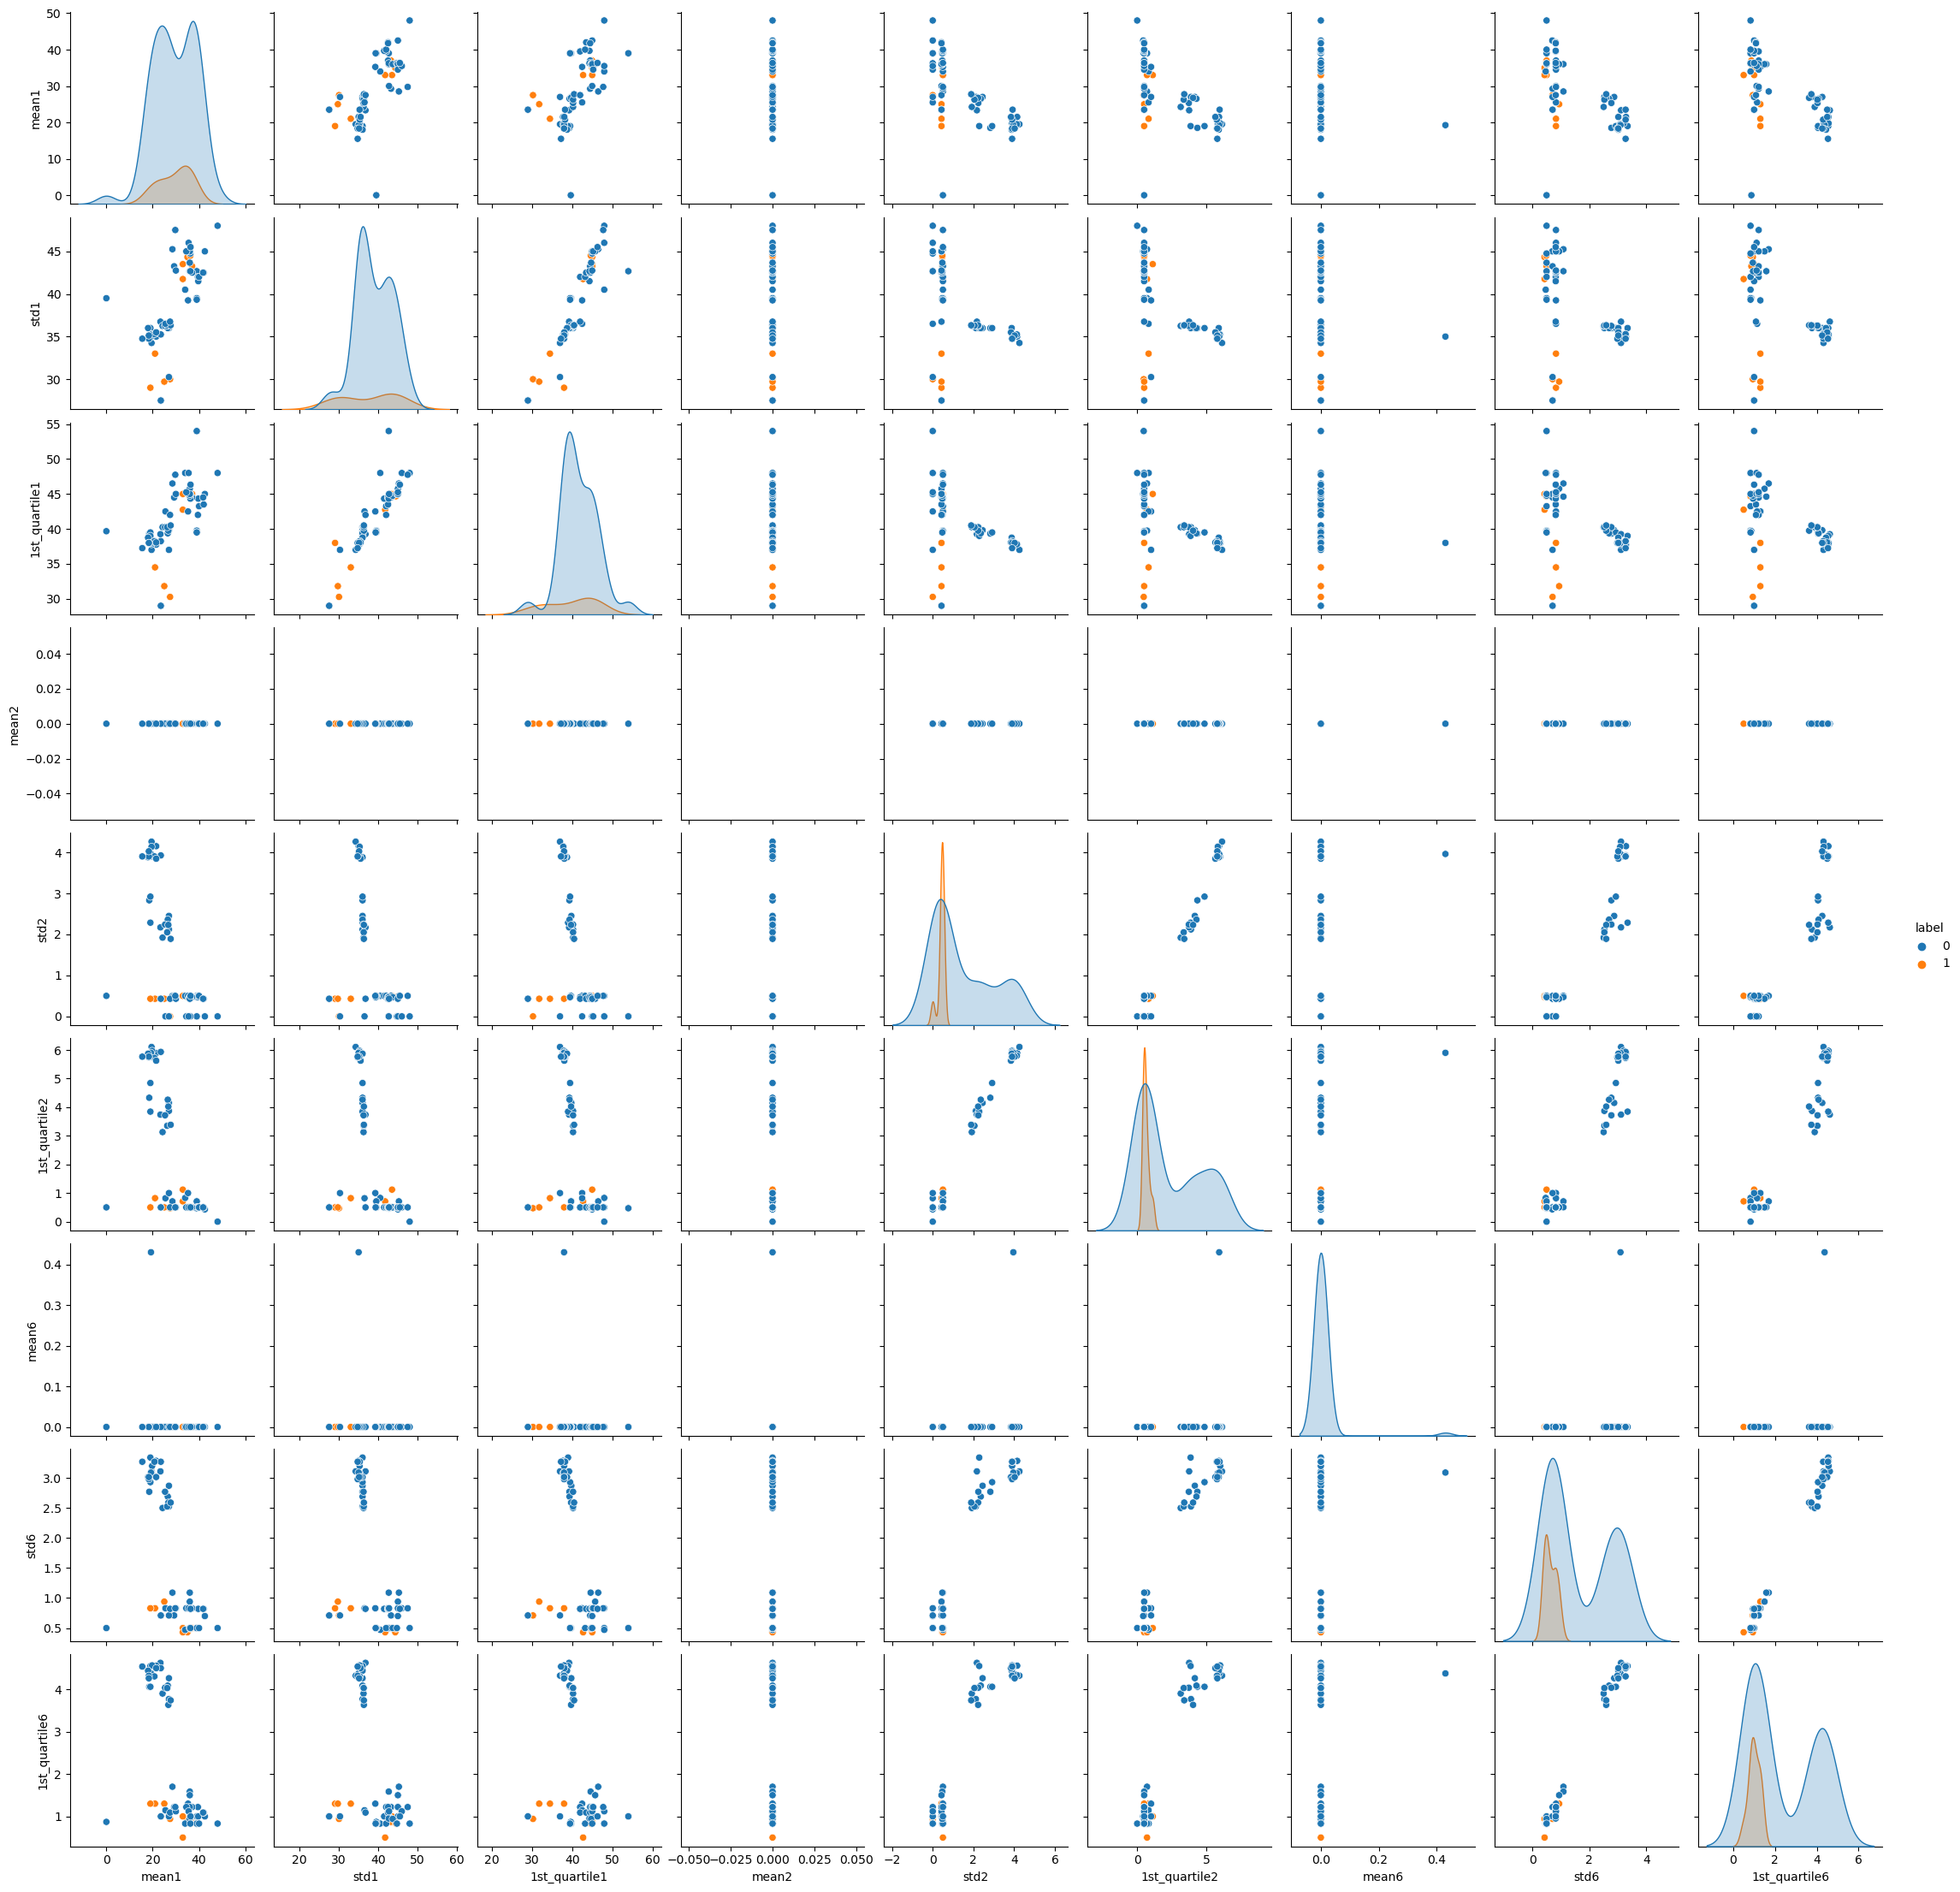

In [15]:
sns.pairplot(df_a_i, hue='label')
plt.show()


#### ii. Splitted Plots

In [16]:
def get_stats(data):
    statistics = data.describe()
    stats = {}
    stats['mean'] = statistics[1:2].values[0].tolist()
    stats['std'] = statistics[2:3].values[0].tolist()
    stats['median'] = statistics[5:6].values[0].tolist()
    stats['min'] = statistics[3:4].values[0].tolist()
    stats['max'] = statistics[7:8].values[0].tolist()
    stats['1st_quartile'] = statistics[4:5].values[0].tolist()
    stats['3rd_quartile'] = statistics[6:7].values[0].tolist()
    return stats

In [19]:
def get_splitted_data(f, n=2):
    delimiter = csv.Sniffer().sniff(open(f).read()).delimiter
    if delimiter == ",":
        fc = pd.read_csv(f, skiprows=5, header=None, on_bad_lines='skip')
    else:
        fc = pd.read_csv(f, skiprows=5, sep="\\s+", header=None, on_bad_lines='skip')

    fc.columns = COLUMN_NAMES
    fc = fc.drop('# Columns: time', axis=1)
    splits = np.array_split(fc, n)
    return splits

In [20]:
features_time_series = [1, 2, 12]
features_scatter = []
features = ['mean', 'std', '1st_quartile']
train_data_1_2_12 = []
for f in train:
    activity = f.split(os.sep)[1]
    splits = get_splitted_data(f, 2)
    cnt = 0
    row = []
    for split in splits:
        stats = get_stats(split)
        for feature in features:
            dataFeaturesStats = stats[feature]
            for i in range(0, 6):
                if (i+cnt+1) in features_time_series:
                    if len(features_scatter)<len(features)*len(features_time_series):
                        features_scatter.append(feature + '_' + COLUMN_NAMES[i+1])
                    row.append(dataFeaturesStats[i])
        cnt += 6
    if activity=='bending1' or activity=='bending2':
        row.append(1)
    else:
        row.append(0)
    train_data_1_2_12.append(row)

In [21]:
features_scatter.append('label')
train_data_1_2_12 = pd.DataFrame(train_data_1_2_12, columns=features_scatter)
train_data_1_2_12

,mean_avg_rss12,mean_var_rss12,std_avg_rss12,std_var_rss12,1st_quartile_avg_rss12,1st_quartile_var_rss12,mean_var_rss23,std_var_rss23,1st_quartile_var_rss23,label
0,44.057167,0.381042,1.556971,0.329540,43.2500,0.0000,0.388333,0.478528,0.0000,1
1,43.278875,0.673292,3.473355,0.634285,42.0000,0.0000,0.586083,0.491873,0.0000,1
2,41.621208,0.623083,3.118644,0.489595,39.6525,0.4300,0.347500,0.363144,0.0000,1
3,44.117042,0.250042,1.359836,0.314099,43.5000,0.0000,0.543875,0.473445,0.4300,1
4,43.486208,0.378667,1.281976,0.284434,42.3300,0.0000,0.585750,0.487918,0.4225,1
...,...,...,...,...,...,...,...,...,...,...
64,34.966250,4.207958,4.733014,2.331940,32.0000,2.4800,3.430208,1.647979,2.1700,0
65,34.737042,4.217333,4.276717,2.337759,32.0000,2.3750,3.225917,1.665326,2.0500,0
66,33.886458,4.332208,5.143776,2.453111,30.4575,2.4900,3.274750,1.670593,2.0500,0
67,34.836458,4.257750,4.869092,2.512633,32.0000,2.4500,3.409458,1.707089,2.1700,0


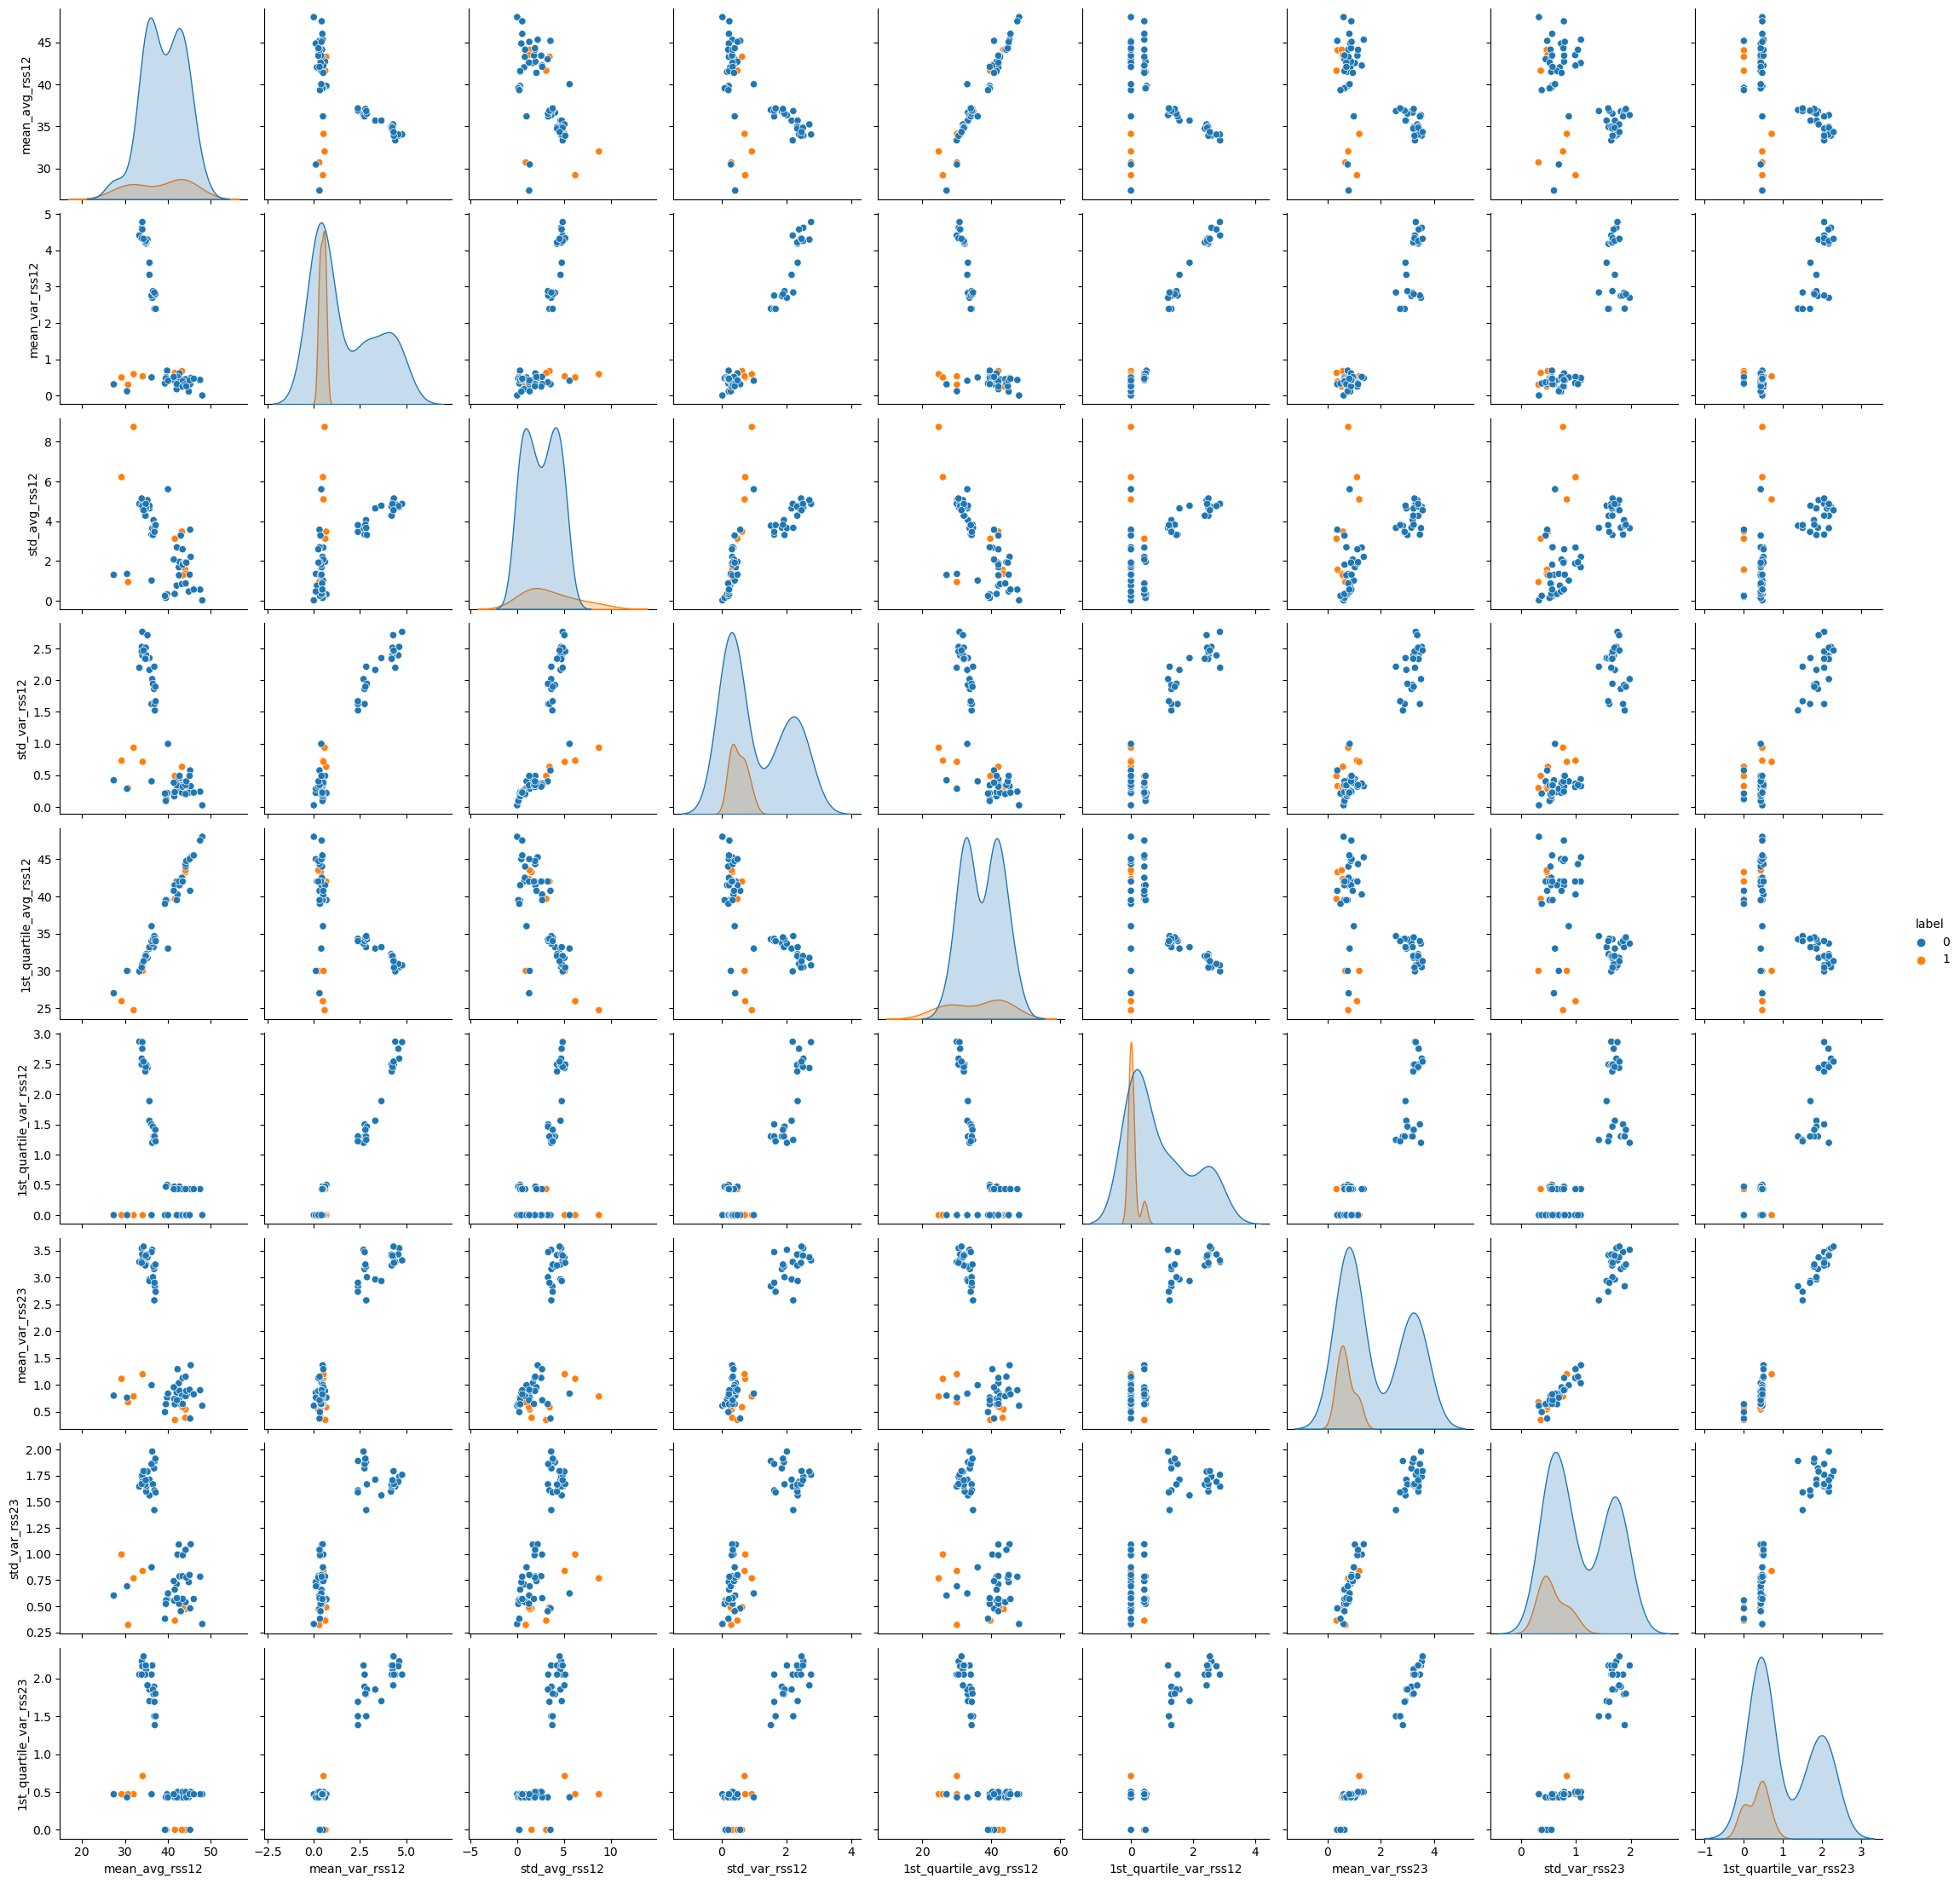

In [22]:
sns.pairplot(train_data_1_2_12, hue='label')
plt.show()

#### iii. Time Series Segments

In [23]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import RFECV, chi2
from sklearn import metrics

In [24]:
def perform_classification_lg(X_train, X_val, y_train, y_val, features_scatter):
    lg = LogisticRegression(solver='liblinear')
    rfecv = RFECV(estimator=lg, cv=StratifiedKFold(5))
    rfecv.fit(X_train, y_train)
    ranking = rfecv.ranking_

    best_features = []
    for i in range(0, len(ranking)):
        if ranking[i]==1:
            best_features.append(features_scatter[i])
    X_train = X_train.loc[:,best_features]
    X_val = X_val.loc[:,best_features]
    lg.fit(X_train, y_train)
    y_pred = lg.predict(X_val)
    y_pred_proba = lg.predict_proba(X_val)[::, 1]
    acc = metrics.accuracy_score(y_val, y_pred)
    auc = metrics.roc_auc_score(y_val, y_pred_proba)
    return acc, auc, best_features

In [25]:
features_time_series = [1, 2, 3, 4, 5, 6]
features = ['mean', 'std', '1st_quartile']
performance_data = []
training_data = {}
for L in range(1, 21):
    print(f'L: {L}')
    features_scatter = []
    train_data_iii = []
    for f in train:
        activity = f.split(os.sep)[1]
        splits = get_splitted_data(f, L)
        row = []
        for split_num, split in enumerate(splits):
            stats = get_stats(split)
            for feature in features:
                dataFeaturesStats = stats[feature]
                for i in range(0, 6):
                    if len(features_scatter)<len(features)*len(features_time_series)*L:
                        features_scatter.append(feature + '_Split' + str(split_num) +  '_' + COLUMN_NAMES[i+1])
                    row.append(dataFeaturesStats[i])
            
        if activity=='bending1' or activity=='bending2':
            row.append(1)
        else:
            row.append(0)
        train_data_iii.append(row)
    features_scatter.append('label')
    train_data_iii = pd.DataFrame(train_data_iii, columns=features_scatter)
    
    accs = []
    aucs = []
    best_features = []
    stratifiedKFolds = StratifiedKFold(n_splits=5, shuffle=False)
    for train_idx, val_idx in stratifiedKFolds.split(train_data_iii[features_scatter], train_data_iii['label']):
        
        Xy_train = pd.DataFrame([train_data_iii[features_scatter].iloc[idx] for idx in train_idx])
        y_train = Xy_train['label']
        X_train = Xy_train.drop('label', axis=1)

        Xy_val = pd.DataFrame([train_data_iii[features_scatter].iloc[idx] for idx in val_idx])
        y_val = Xy_val['label']
        X_val = Xy_val.drop('label', axis=1)

        acc, auc, bestFeatures = perform_classification_lg(X_train, X_val, y_train, y_val, features_scatter)
        best_features.append(bestFeatures)     
        accs.append(acc)
        aucs.append(auc)
    data = {}
    data['L'] = L
    data['Accuracy'] = np.mean(accs)
    data['AUC'] = np.mean(aucs)
    data['Best Features'] = best_features[np.argmax(aucs)]
    performance_data.append(data)
    training_data[L] = train_data_iii

L: 1
L: 2
L: 3
L: 4
L: 5
L: 6
L: 7
L: 8
L: 9
L: 10
L: 11
L: 12
L: 13
L: 14
L: 15
L: 16
L: 17
L: 18
L: 19
L: 20


In [26]:
performance_df = pd.DataFrame(performance_data)
performance_df.drop('Best Features', axis=1)

,L,Accuracy,AUC
0,1,0.956044,0.983333
1,2,0.913187,0.950000
2,3,0.957143,0.950000
3,4,0.900000,0.966667
4,5,0.927473,0.983333
5,6,0.957143,0.983333
6,7,0.942857,0.975000
7,8,0.898901,0.975000
8,9,0.927473,0.983333
9,10,0.942857,0.925000


In [27]:
best_L_iii = 11
best_features_iii = performance_df[performance_df['L'] == best_L_iii]['Best Features'].iloc[0]
best_features_iii

['mean_Split1_avg_rss23',
 '1st_quartile_Split1_avg_rss23',
 'mean_Split6_avg_rss12',
 'mean_Split9_avg_rss13',
 'std_Split9_avg_rss12',
 '1st_quartile_Split9_avg_rss23']

#### iv. Confusion Matrix

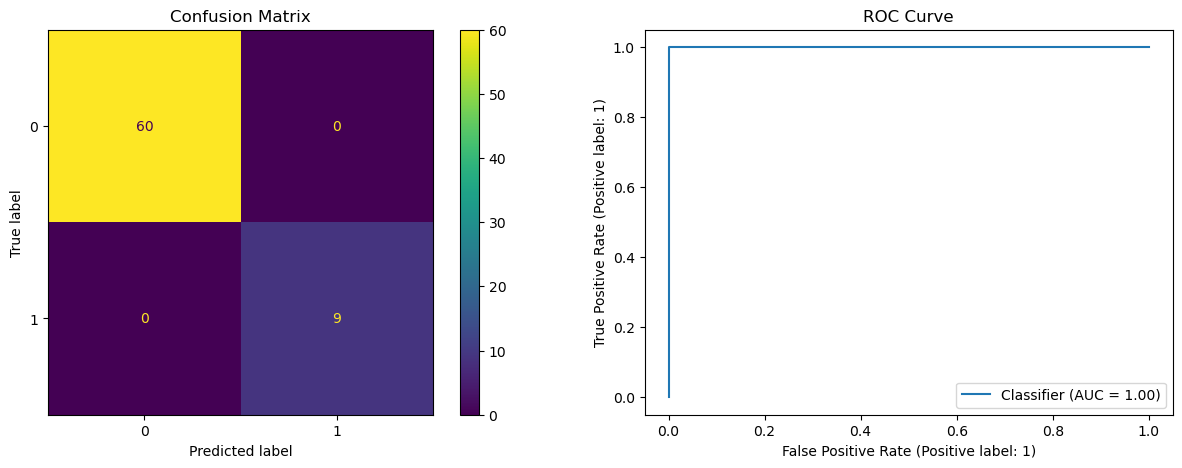

In [28]:
X_train_iv = training_data[best_L_iii][best_features_iii]
y_train_iv = train_data_iii['label']

lg = LogisticRegression(solver='liblinear').fit(X_train_iv, y_train_iv)
y_pred_train = lg.predict(X_train_iv)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
metrics.ConfusionMatrixDisplay.from_predictions(y_train_iv, y_pred_train, ax=ax1)
ax1.set_title('Confusion Matrix')

metrics.RocCurveDisplay.from_predictions(y_train_iv, y_pred_train, ax=ax2)
ax2.set_title('ROC Curve')
plt.show()

In [29]:
_, p_vals = chi2(X_train_iv, y_train_iv)
coef_df_iv = pd.DataFrame({'Feature': best_features_iii, 'Coefficient': lg.coef_[0], 'p-value': p_vals})
coef_df_iv

,Feature,Coefficient,p-value
0,mean_Split1_avg_rss23,0.346166,1.893297e-21
1,1st_quartile_Split1_avg_rss23,0.456845,8.401870e-25
2,mean_Split6_avg_rss12,-0.498035,2.353344e-01
3,mean_Split9_avg_rss13,-0.331494,3.512925e-01
4,std_Split9_avg_rss12,-0.339290,2.124005e-02
5,1st_quartile_Split9_avg_rss23,0.421498,1.980709e-12


#### v. Test Classifier

In [30]:
test_data_iv = []
features_scatter = []
L = best_L_iii
for f in test:
    activity = f.split(os.sep)[1]
    splits = get_splitted_data(f, L)
    row = []
    for split_num, split in enumerate(splits):
        stats = get_stats(split)
        for feature in features:
            dataFeaturesStats = stats[feature]
            for i in range(0, 6):
                if len(features_scatter)<len(features)*len(features_time_series)*L:
                    features_scatter.append(feature + '_Split' + str(split_num) +  '_' + COLUMN_NAMES[i+1])
                row.append(dataFeaturesStats[i])

    if activity=='bending1' or activity=='bending2':
        row.append(1)
    else:
        row.append(0)
    test_data_iv.append(row)
features_scatter.append('label')
test_data_iv = pd.DataFrame(test_data_iv, columns=features_scatter)

In [31]:
X_test_iv = test_data_iv[best_features_iii]
y_test_iv = test_data_iv['label']
y_pred_iv = lg.predict(X_test_iv)

print('Accuracy: %.3f' % metrics.accuracy_score(y_test_iv, y_pred_iv))

Accuracy: 0.947


In [32]:
performance_df[performance_df['L'] == best_L_iii]

,L,Accuracy,AUC,Best Features
10,11,0.971429,1.0,"[mean_Split1_avg_rss23, 1st_quartile_Split1_av..."


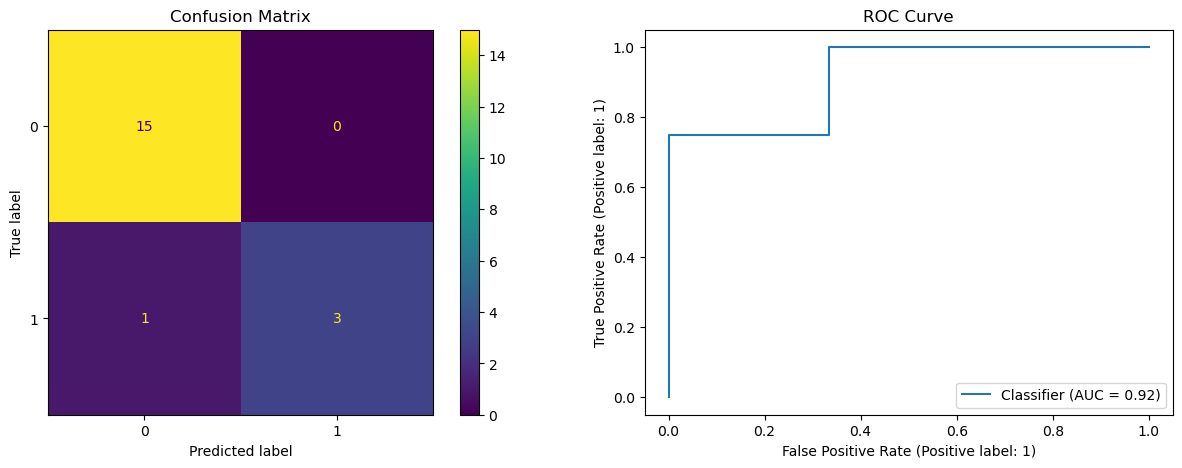

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
metrics.ConfusionMatrixDisplay.from_predictions(y_test_iv, y_pred_iv, ax=ax1)
ax1.set_title('Confusion Matrix')

metrics.RocCurveDisplay.from_predictions(y_test_iv, lg.predict_proba(X_test_iv)[::,1], ax=ax2)
ax2.set_title('ROC Curve')
plt.show()

#### vi. Separation

xxxxxThe bending and non-bending classes are not very well seprated. Hence standard K-fold Cross Validation may lead to certain folds lacking samples from the underrepresented class. To address this issue and ensure balanced class representation across folds, Stratified K-fold Cross Validation is employed. This approach also enhances the stability of logistic regression parameter caluclations.

#### vii. Imbalance

In [34]:
from imblearn.over_sampling import SMOTE

Before Oversampling Training Data has 56 rows


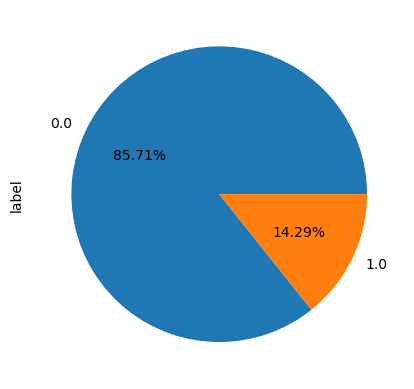

In [35]:
print(f'Before Oversampling Training Data has {X_train.shape[0]} rows')
y_train.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()

In [36]:
smote = SMOTE(sampling_strategy='all')
X_train_smote, y_train_smote = smote.fit_resample(X_train_iv, y_train_iv)

Before Oversampling Training Data has 120 rows


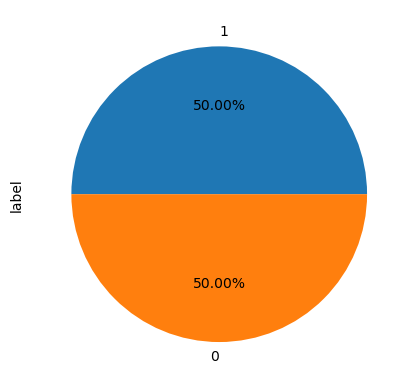

In [37]:
print(f'Before Oversampling Training Data has {X_train_smote.shape[0]} rows')
y_train_smote.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.show()

In [38]:
def evaluate(y_true, y_pred, y_proba):
    print('Accuracy: %.3f' % metrics.accuracy_score(y_true, y_pred))
    print('AUC: %.3f' % metrics.roc_auc_score(y_true, y_proba))


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax1)
    ax1.set_title('Confusion Matrix')

    metrics.RocCurveDisplay.from_predictions(y_true, y_proba, ax=ax2)
    ax2.set_title('ROC Curve')
    plt.show()

Accuracy: 1.000
AUC: 1.000


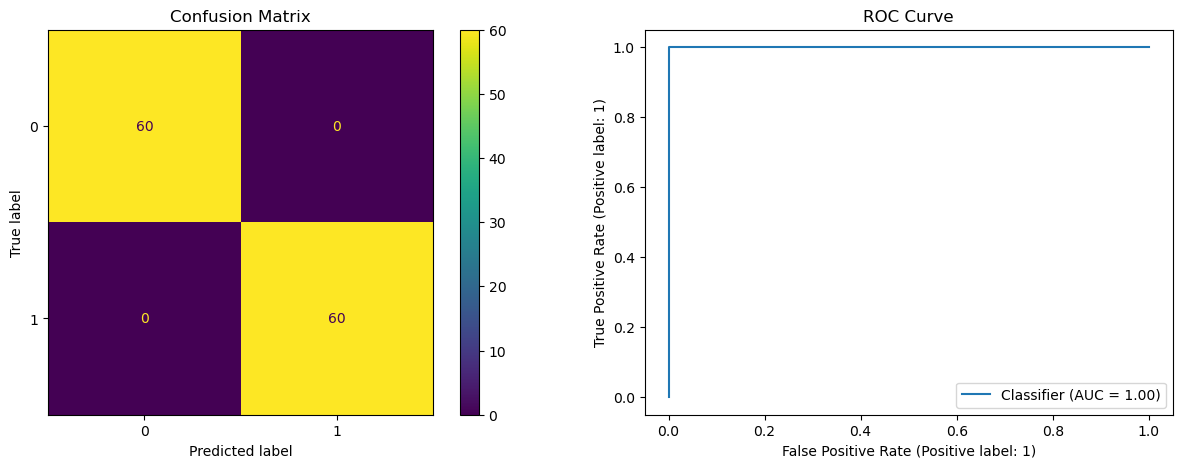

In [39]:
lg = LogisticRegression(solver='liblinear').fit(X_train_smote, y_train_smote)
y_pred_train = lg.predict(X_train_smote)
y_pred_train_proba = lg.predict_proba(X_train_smote)[::, 1]

evaluate(y_train_smote, y_pred_train, y_pred_train_proba)


Accuracy: 0.947
AUC: 0.900


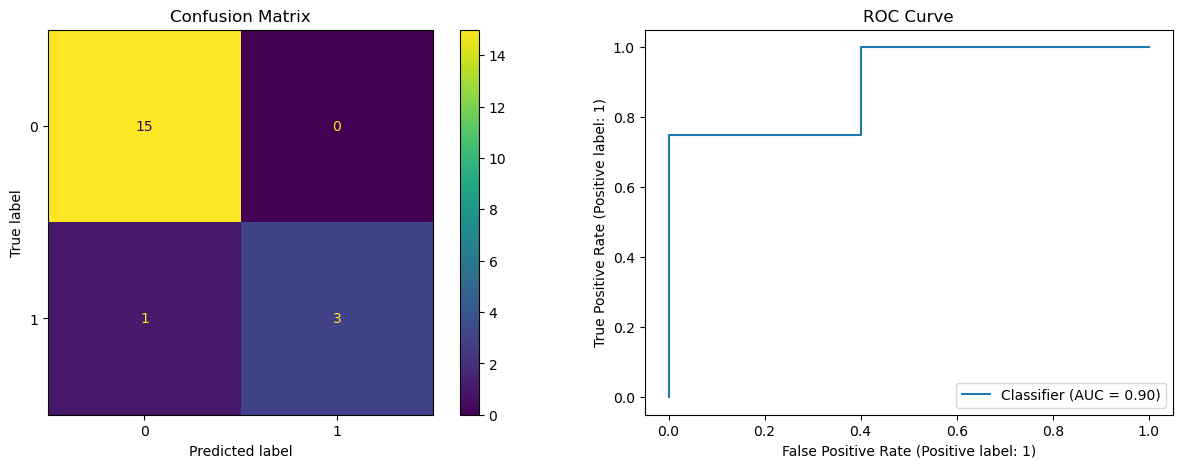

In [40]:
y_pred_test = lg.predict(X_test_iv)
y_pred_test_proba = lg.predict_proba(X_test_iv)[::, 1]

evaluate(y_test_iv, y_pred_test, y_pred_test_proba)


### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [41]:
def perform_classification_lg_l1(X_train, X_val, y_train, y_val, features_scatter):
    lg = LogisticRegressionCV(cv=5, solver='liblinear', penalty='l1', max_iter=1000)
    lg.fit(X_train, y_train)
    penalty = lg.C_[0]
    lambda_ = float(1/penalty)

    y_pred = lg.predict(X_val)
    y_pred_proba = lg.predict_proba(X_val)[::, 1]
    acc = metrics.accuracy_score(y_val, y_pred)
    auc = metrics.roc_auc_score(y_val, y_pred_proba)
    return acc, auc, penalty, lambda_

In [42]:
features_time_series = [1, 2, 3, 4, 5, 6]
features = ['mean', 'std', '1st_quartile']
performance_data_l1 = []
training_data_l1 = {}
for L in range(1, 21):
    print(f'L: {L}')
    features_scatter = []
    train_data_b = []
    for f in train:
        activity = f.split(os.sep)[1]
        splits = get_splitted_data(f, L)
        row = []
        for split_num, split in enumerate(splits):
            stats = get_stats(split)
            for feature in features:
                dataFeaturesStats = stats[feature]
                for i in range(0, 6):
                    if len(features_scatter)<len(features)*len(features_time_series)*L:
                        features_scatter.append(feature + '_Split' + str(split_num) +  '_' + COLUMN_NAMES[i+1])
                    row.append(dataFeaturesStats[i])
            
        if activity=='bending1' or activity=='bending2':
            row.append(1)
        else:
            row.append(0)
        train_data_b.append(row)
    features_scatter.append('label')
    train_data_b = pd.DataFrame(train_data_b, columns=features_scatter)
    
    accs = []
    aucs = []
    lambda_vals = []
    stratifiedKFolds = StratifiedKFold(n_splits=5, shuffle=False)
    for train_idx, val_idx in stratifiedKFolds.split(train_data_b[features_scatter], train_data_b['label']):
        
        Xy_train = pd.DataFrame([train_data_b[features_scatter].iloc[idx] for idx in train_idx])
        y_train = Xy_train['label']
        X_train = Xy_train.drop('label', axis=1)

        Xy_val = pd.DataFrame([train_data_b[features_scatter].iloc[idx] for idx in val_idx])
        y_val = Xy_val['label']
        X_val = Xy_val.drop('label', axis=1)

        acc, auc, penalty, lambda_ = perform_classification_lg_l1(X_train, X_val, y_train, y_val, features_scatter)
        accs.append(acc)
        aucs.append(auc)
        lambda_vals.append(lambda_)
    data = {}
    data['L'] = L
    data['Accuracy'] = np.mean(accs)
    data['AUC'] = np.mean(aucs)
    data['Lamda'] = lambda_vals[np.argmax(aucs)]
    performance_data_l1.append(data)
    training_data_l1[L] = train_data_b

L: 1
L: 2
L: 3
L: 4
L: 5
L: 6
L: 7
L: 8
L: 9
L: 10
L: 11
L: 12
L: 13
L: 14
L: 15
L: 16
L: 17
L: 18
L: 19
L: 20


In [43]:
performance_df_l1 = pd.DataFrame(performance_data_l1)
performance_df_l1

,L,Accuracy,AUC,Lamda
0,1,0.941758,0.791667,0.359381
1,2,0.913187,0.983333,0.359381
2,3,0.942857,0.983333,0.046416
3,4,0.942857,0.983333,0.046416
4,5,0.928571,0.975000,0.359381
5,6,0.928571,0.983333,0.359381
6,7,0.898901,0.975000,2.782559
7,8,0.913187,0.775000,0.359381
8,9,0.927473,1.000000,2.782559
9,10,0.927473,0.991667,0.005995


In [44]:
best_L_b = 9
performance_df_l1[performance_df_l1['L'] == best_L_b]

,L,Accuracy,AUC,Lamda
8,9,0.927473,1.0,2.782559


Accuracy: 1.000
AUC: 1.000


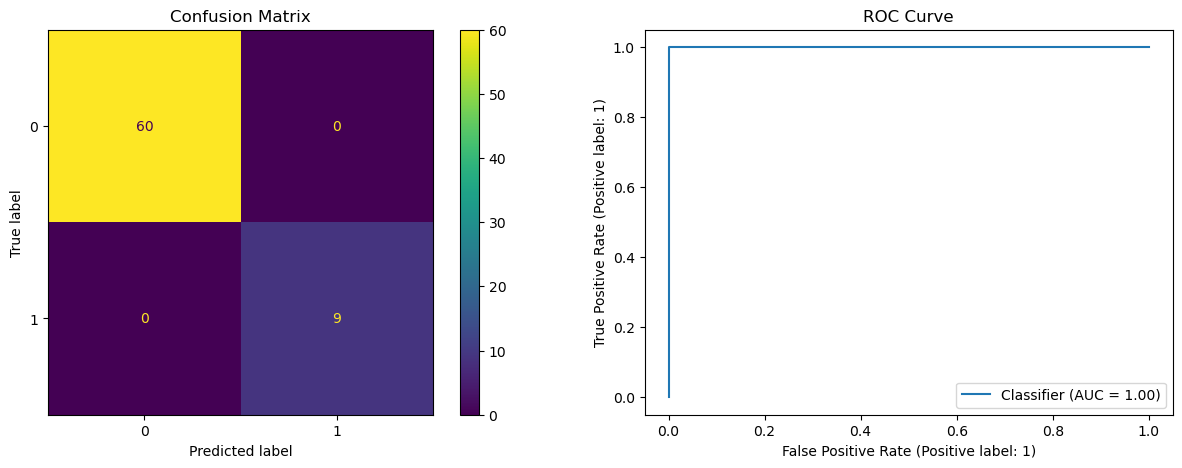

In [45]:
X_train_b = training_data_l1[best_L_b].drop('label', axis=1)
y_train_b = training_data_l1[best_L_b]['label']

C = performance_df_l1[performance_df_l1['L'] == best_L_b]['Lamda'].iloc[0]

lg = LogisticRegression(solver='liblinear', penalty='l1', C=C).fit(X_train_b, y_train_b)
y_pred_train = lg.predict(X_train_b)
y_pred_train_proba = lg.predict_proba(X_train_b)[::, 1]

evaluate(y_train_b, y_pred_train, y_pred_train_proba)

In [46]:
test_data_b = []
features_scatter = []
L = best_L_b
for f in test:
    activity = f.split(os.sep)[1]
    splits = get_splitted_data(f, L)
    row = []
    for split_num, split in enumerate(splits):
        stats = get_stats(split)
        for feature in features:
            dataFeaturesStats = stats[feature]
            for i in range(0, 6):
                if len(features_scatter)<len(features)*len(features_time_series)*L:
                    features_scatter.append(feature + '_Split' + str(split_num) +  '_' + COLUMN_NAMES[i+1])
                row.append(dataFeaturesStats[i])

    if activity=='bending1' or activity=='bending2':
        row.append(1)
    else:
        row.append(0)
    test_data_b.append(row)
features_scatter.append('label')
test_data_b = pd.DataFrame(test_data_b, columns=features_scatter)


Accuracy: 0.947
AUC: 0.950


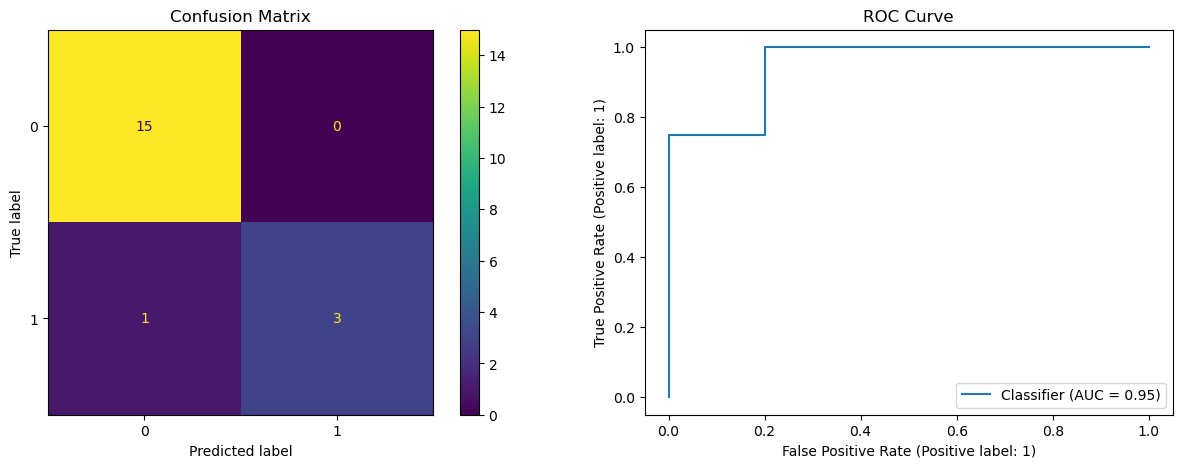

In [48]:
X_test_b = test_data_b.drop('label', axis=1)
y_test_b = test_data_b['label']

y_pred_test = lg.predict(X_test_b)
y_pred_test_proba = lg.predict_proba(X_test_b)[::, 1]

evaluate(y_test_b, y_pred_test, y_pred_test_proba)

#### ii. Comparison

The evaluated models demonstrated overall high performance with minimal performance discrepancies. While all three models achieved similar accuracy scores, L1-penalized Logistic Regression emerged as the frontrunner in terms of AUC score on the testing dataset.

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [49]:
def perform_classification_lg_l1_multiclass(X_train, X_val, y_train, y_val):
    lg = LogisticRegressionCV(cv=5, solver='liblinear', penalty='l1', multi_class='auto', max_iter=1000)
    lg.fit(X_train, y_train)
    penalty = lg.C_
    
    y_pred = lg.predict(X_val)
    acc = metrics.accuracy_score(y_val, y_pred)
    return acc, penalty

In [50]:
features_time_series = [1, 2, 3, 4, 5, 6]
features = ['mean', 'std', '1st_quartile']
classes = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

performance_data_l1_c = []
training_data_l1_c = {}
penalties_c = {}

for L in range(1, 21):
    print(f'L: {L}')
    features_scatter = []
    train_data_c = []
    for f in train:
        activity = f.split(os.sep)[1]
        splits = get_splitted_data(f, L)
        row = []
        for split_num, split in enumerate(splits):
            stats = get_stats(split)
            for feature in features:
                dataFeaturesStats = stats[feature]
                for i in range(0, 6):
                    if len(features_scatter)<len(features)*len(features_time_series)*L:
                        features_scatter.append(feature + '_Split' + str(split_num) +  '_' + COLUMN_NAMES[i+1])
                    row.append(dataFeaturesStats[i])
            
        row.append(classes.index(activity))
        train_data_c.append(row)
    features_scatter.append('label')
    train_data_c = pd.DataFrame(train_data_c, columns=features_scatter)
    
    accs = []
    penalties = []
    stratifiedKFolds = StratifiedKFold(n_splits=5, shuffle=False)
    for train_idx, val_idx in stratifiedKFolds.split(train_data_c[features_scatter], train_data_c['label']):
        
        Xy_train = pd.DataFrame([train_data_c[features_scatter].iloc[idx] for idx in train_idx])
        y_train = Xy_train['label']
        X_train = Xy_train.drop('label', axis=1)

        Xy_val = pd.DataFrame([train_data_c[features_scatter].iloc[idx] for idx in val_idx])
        y_val = Xy_val['label']
        X_val = Xy_val.drop('label', axis=1)
        
        acc, penalty = perform_classification_lg_l1_multiclass(X_train, X_val, y_train, y_val)
        accs.append(acc)
        penalties.append(penalty)
    data = {}
    data['L'] = L
    data['Accuracy'] = np.mean(accs)
    performance_data_l1_c.append(data)
    penalties_c[L] = penalties[np.argmax(accs)]
    training_data_l1_c[L] = train_data_c

L: 1
L: 2
L: 3
L: 4
L: 5
L: 6
L: 7
L: 8
L: 9
L: 10
L: 11
L: 12
L: 13
L: 14
L: 15
L: 16
L: 17
L: 18
L: 19
L: 20


In [51]:
performance_df_lg_c = pd.DataFrame(performance_data_l1_c)
performance_df_lg_c

,L,Accuracy
0,1,0.827473
1,2,0.769231
2,3,0.769231
3,4,0.737363
4,5,0.698901
5,6,0.726374
6,7,0.768132
7,8,0.723077
8,9,0.668132
9,10,0.756044


In [52]:
best_L_c = 1
penalties_c_lg_df = pd.DataFrame({'Class': classes, 'Penalty': penalties_c[best_L_c]})
penalties_c_lg_df['lambda'] = 1/penalties_c_lg_df['Penalty']
penalties_c_lg_df

,Class,Penalty,lambda
0,bending1,166.810054,0.005995
1,bending2,0.000100,10000.000000
2,cycling,2.782559,0.359381
3,lying,0.359381,2.782559
4,sitting,21.544347,0.046416
5,standing,2.782559,0.359381
6,walking,0.359381,2.782559


Accuracy: 0.957


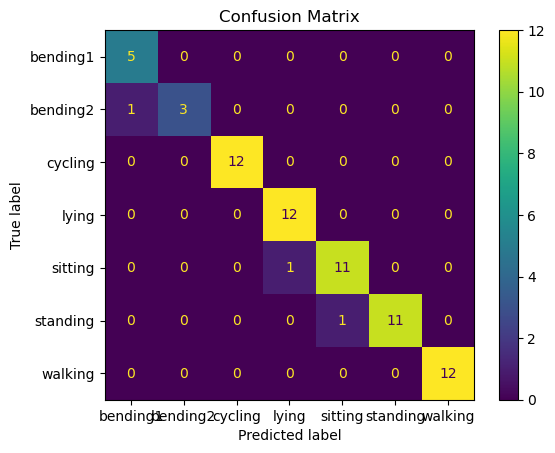

In [53]:
X_train_c = training_data_l1_c[best_L_c].drop('label', axis=1)
y_train_c = training_data_l1_c[best_L_c]['label']

lg = LogisticRegression(solver='liblinear', penalty='l1').fit(X_train_c, y_train_c)
y_pred_train = lg.predict(X_train_c)

print('Accuracy: %.3f' % metrics.accuracy_score(y_train_c, y_pred_train))


metrics.ConfusionMatrixDisplay.from_predictions(y_train_c, y_pred_train, display_labels=classes)
plt.title('Confusion Matrix')
plt.show()

In [54]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [55]:
y_train_c_bin = label_binarize(y_train_c, classes=list(range(len(classes))))
ovr_lg = OneVsRestClassifier(lg).fit(X_train_c, y_train_c_bin)
y_pred_train_proba = ovr_lg.predict_proba(X_train_c)

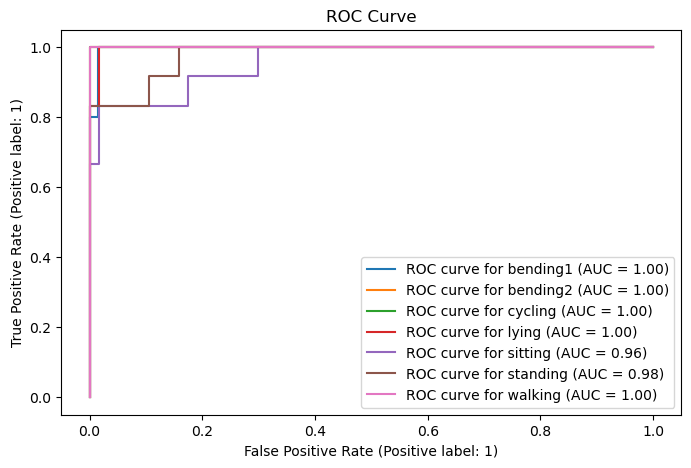

In [56]:
fig, ax = plt.subplots(figsize=(8, 5))
for class_id in range(len(classes)):
    metrics.RocCurveDisplay.from_predictions(
        y_train_c_bin[:, class_id],
        y_pred_train_proba[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        ax=ax,
    )
ax.set_title('ROC Curve')
plt.show()

In [57]:
test_data_c = []
features_scatter = []
L = best_L_c
for f in test:
    activity = f.split(os.sep)[1]
    splits = get_splitted_data(f, L)
    row = []
    for split_num, split in enumerate(splits):
        stats = get_stats(split)
        for feature in features:
            dataFeaturesStats = stats[feature]
            for i in range(0, 6):
                if len(features_scatter)<len(features)*len(features_time_series)*L:
                    features_scatter.append(feature + '_Split' + str(split_num) +  '_' + COLUMN_NAMES[i+1])
                row.append(dataFeaturesStats[i])

    row.append(classes.index(activity))
    test_data_c.append(row)
features_scatter.append('label')
test_data_c = pd.DataFrame(test_data_c, columns=features_scatter)


Accuracy: 0.789
Test Error: 0.211


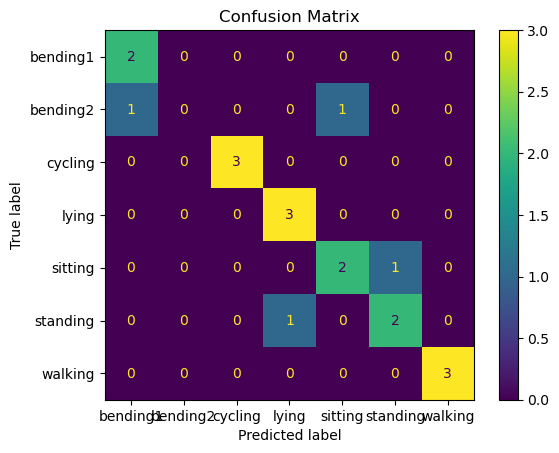

In [58]:
X_test_c = test_data_c.drop('label', axis=1)
y_test_c = test_data_c['label']

y_pred_test = lg.predict(X_test_c)
acc =  metrics.accuracy_score(y_test_c, y_pred_test)
print('Accuracy: %.3f' % acc)
print('Test Error: %.3f' % (1-acc))

metrics.ConfusionMatrixDisplay.from_predictions(y_test_c, y_pred_test, display_labels=classes)
plt.title('Confusion Matrix')
plt.show()

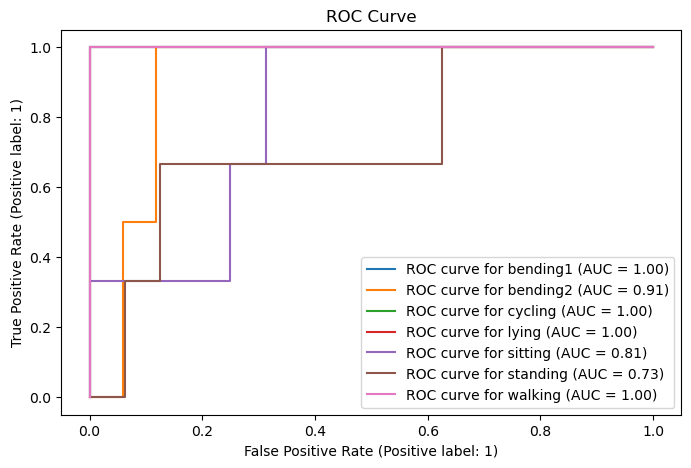

In [59]:
y_test_c_bin = label_binarize(y_test_c, classes=list(range(len(classes))))
y_pred_test_proba = ovr_lg.predict_proba(X_test_c)

fig, ax = plt.subplots(figsize=(8, 5))
for class_id in range(len(classes)):
    metrics.RocCurveDisplay.from_predictions(
        y_test_c_bin[:, class_id],
        y_pred_test_proba[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        ax=ax,
    )
ax.set_title('ROC Curve')
plt.show()

#### ii. Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [61]:
def perform_classification_nb_multiclass(nb, X_train, X_val, y_train, y_val):
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_val)
    acc = metrics.accuracy_score(y_val, y_pred)
    return acc

In [62]:
## GaussianNB
features_time_series = [1, 2, 3, 4, 5, 6]
features = ['mean', 'std', '1st_quartile']
classes = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

performance_data_gnb_c = []
training_data_gnb_c = {}

for L in range(1, 21):
    print(f'L: {L}')
    features_scatter = []
    train_data_c = []
    for f in train:
        activity = f.split(os.sep)[1]
        splits = get_splitted_data(f, L)
        row = []
        for split_num, split in enumerate(splits):
            stats = get_stats(split)
            for feature in features:
                dataFeaturesStats = stats[feature]
                for i in range(0, 6):
                    if len(features_scatter)<len(features)*len(features_time_series)*L:
                        features_scatter.append(feature + '_Split' + str(split_num) +  '_' + COLUMN_NAMES[i+1])
                    row.append(dataFeaturesStats[i])
            
        row.append(classes.index(activity))
        train_data_c.append(row)
    features_scatter.append('label')
    train_data_c = pd.DataFrame(train_data_c, columns=features_scatter)
    
    accs = []
    stratifiedKFolds = StratifiedKFold(n_splits=5, shuffle=False)
    for train_idx, val_idx in stratifiedKFolds.split(train_data_c[features_scatter], train_data_c['label']):
        
        Xy_train = pd.DataFrame([train_data_c[features_scatter].iloc[idx] for idx in train_idx])
        y_train = Xy_train['label']
        X_train = Xy_train.drop('label', axis=1)

        Xy_val = pd.DataFrame([train_data_c[features_scatter].iloc[idx] for idx in val_idx])
        y_val = Xy_val['label']
        X_val = Xy_val.drop('label', axis=1)
        
        acc = perform_classification_nb_multiclass(GaussianNB(), X_train, X_val, y_train, y_val)
        accs.append(acc)
        
    data = {}
    data['L'] = L
    data['Accuracy'] = np.mean(accs)
    performance_data_gnb_c.append(data)
    training_data_gnb_c[L] = train_data_c

L: 1
L: 2
L: 3
L: 4
L: 5
L: 6
L: 7
L: 8
L: 9
L: 10
L: 11
L: 12
L: 13
L: 14
L: 15
L: 16
L: 17
L: 18
L: 19
L: 20


In [63]:
performance_df_gnb_c = pd.DataFrame(performance_data_gnb_c)
performance_df_gnb_c

,L,Accuracy
0,1,0.780220
1,2,0.814286
2,3,0.754945
3,4,0.710989
4,5,0.726374
5,6,0.752747
6,7,0.683516
7,8,0.681319
8,9,0.710989
9,10,0.738462


Accuracy: 0.986


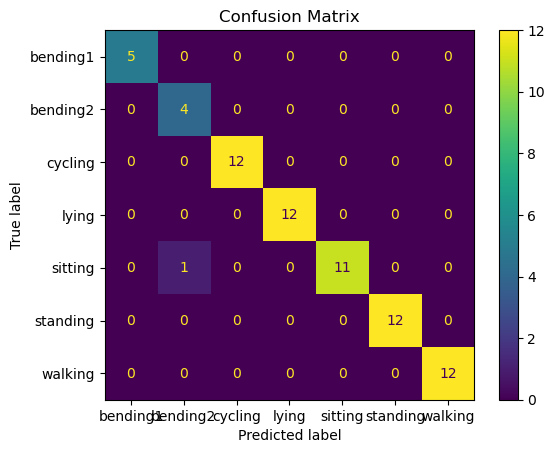

In [64]:
best_L_gnb = 2

X_train_c = training_data_gnb_c[best_L_gnb].drop('label', axis=1)
y_train_c = training_data_gnb_c[best_L_gnb]['label']

nb = GaussianNB().fit(X_train_c, y_train_c)
y_pred_train = nb.predict(X_train_c)

print('Accuracy: %.3f' % metrics.accuracy_score(y_train_c, y_pred_train))


metrics.ConfusionMatrixDisplay.from_predictions(y_train_c, y_pred_train, display_labels=classes)
plt.title('Confusion Matrix')
plt.show()

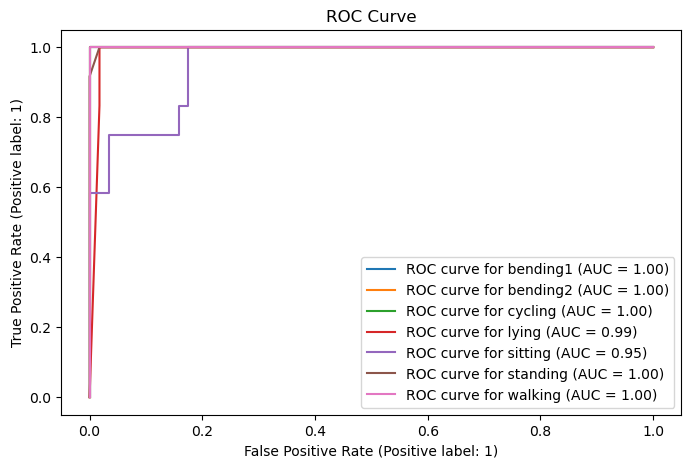

In [65]:
y_train_c_bin = label_binarize(y_train_c, classes=list(range(len(classes))))
ovr_nb = OneVsRestClassifier(nb).fit(X_train_c, y_train_c_bin)
y_pred_train_proba = ovr_nb.predict_proba(X_train_c)

fig, ax = plt.subplots(figsize=(8, 5))
for class_id in range(len(classes)):
    metrics.RocCurveDisplay.from_predictions(
        y_train_c_bin[:, class_id],
        y_pred_train_proba[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        ax=ax,
    )
ax.set_title('ROC Curve')
plt.show()

Accuracy: 0.737
Test Error: 0.263


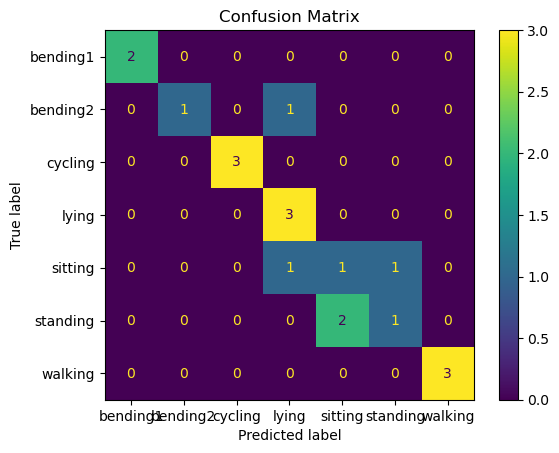

In [66]:
test_data_c = []
features_scatter = []
L = best_L_gnb
for f in test:
    activity = f.split(os.sep)[1]
    splits = get_splitted_data(f, L)
    row = []
    for split_num, split in enumerate(splits):
        stats = get_stats(split)
        for feature in features:
            dataFeaturesStats = stats[feature]
            for i in range(0, 6):
                if len(features_scatter)<len(features)*len(features_time_series)*L:
                    features_scatter.append(feature + '_Split' + str(split_num) +  '_' + COLUMN_NAMES[i+1])
                row.append(dataFeaturesStats[i])

    row.append(classes.index(activity))
    test_data_c.append(row)
features_scatter.append('label')
test_data_c = pd.DataFrame(test_data_c, columns=features_scatter)

X_test_c = test_data_c.drop('label', axis=1)
y_test_c = test_data_c['label']

y_pred_test = nb.predict(X_test_c)
acc =  metrics.accuracy_score(y_test_c, y_pred_test)
print('Accuracy: %.3f' % acc)
print('Test Error: %.3f' % (1-acc))

metrics.ConfusionMatrixDisplay.from_predictions(y_test_c, y_pred_test, display_labels=classes)
plt.title('Confusion Matrix')
plt.show()

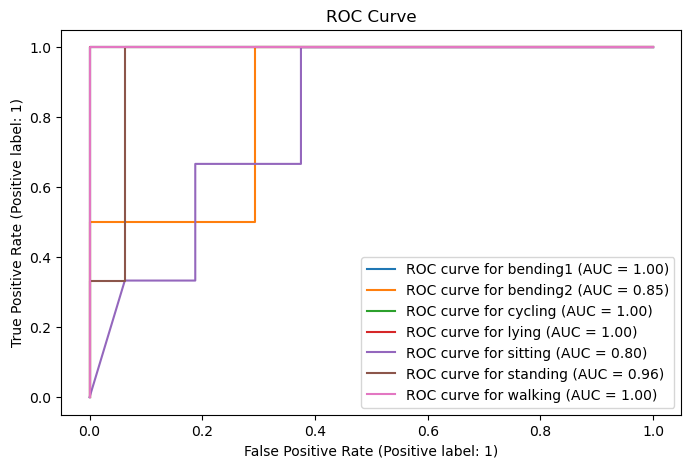

In [67]:
y_test_c_bin = label_binarize(y_test_c, classes=list(range(len(classes))))
y_pred_test_proba = ovr_nb.predict_proba(X_test_c)

fig, ax = plt.subplots(figsize=(8, 5))
for class_id in range(len(classes)):
    metrics.RocCurveDisplay.from_predictions(
        y_test_c_bin[:, class_id],
        y_pred_test_proba[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        ax=ax,
    )
ax.set_title('ROC Curve')
plt.show()

In [68]:
# MultinomialNB
features_time_series = [1, 2, 3, 4, 5, 6]
features = ['mean', 'std', '1st_quartile']
classes = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

performance_data_mnb_c = []
training_data_mnb_c = {}

for L in range(1, 21):
    print(f'L: {L}')
    features_scatter = []
    train_data_c = []
    for f in train:
        activity = f.split(os.sep)[1]
        splits = get_splitted_data(f, L)
        row = []
        for split_num, split in enumerate(splits):
            stats = get_stats(split)
            for feature in features:
                dataFeaturesStats = stats[feature]
                for i in range(0, 6):
                    if len(features_scatter)<len(features)*len(features_time_series)*L:
                        features_scatter.append(feature + '_Split' + str(split_num) +  '_' + COLUMN_NAMES[i+1])
                    row.append(dataFeaturesStats[i])
            
        row.append(classes.index(activity))
        train_data_c.append(row)
    features_scatter.append('label')
    train_data_c = pd.DataFrame(train_data_c, columns=features_scatter)
    
    accs = []
    stratifiedKFolds = StratifiedKFold(n_splits=5, shuffle=False)
    for train_idx, val_idx in stratifiedKFolds.split(train_data_c[features_scatter], train_data_c['label']):
        
        Xy_train = pd.DataFrame([train_data_c[features_scatter].iloc[idx] for idx in train_idx])
        y_train = Xy_train['label']
        X_train = Xy_train.drop('label', axis=1)

        Xy_val = pd.DataFrame([train_data_c[features_scatter].iloc[idx] for idx in val_idx])
        y_val = Xy_val['label']
        X_val = Xy_val.drop('label', axis=1)
        
        acc = perform_classification_nb_multiclass(MultinomialNB(), X_train, X_val, y_train, y_val)
        accs.append(acc)
        
    data = {}
    data['L'] = L
    data['Accuracy'] = np.mean(accs)
    performance_data_mnb_c.append(data)
    training_data_mnb_c[L] = train_data_c

L: 1
L: 2
L: 3
L: 4
L: 5
L: 6
L: 7
L: 8
L: 9
L: 10
L: 11
L: 12
L: 13
L: 14
L: 15
L: 16
L: 17
L: 18
L: 19
L: 20


In [69]:
performance_df_mnb_c = pd.DataFrame(performance_data_mnb_c)
performance_df_mnb_c

,L,Accuracy
0,1,0.783516
1,2,0.738462
2,3,0.781319
3,4,0.752747
4,5,0.796703
5,6,0.812088
6,7,0.783516
7,8,0.768132
8,9,0.826374
9,10,0.783516


Accuracy: 0.942


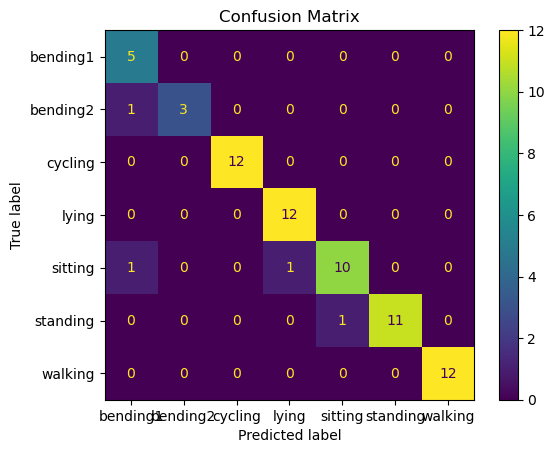

In [70]:
best_L_mnb = 9

X_train_c = training_data_gnb_c[best_L_mnb].drop('label', axis=1)
y_train_c = training_data_gnb_c[best_L_mnb]['label']

nb = MultinomialNB().fit(X_train_c, y_train_c)
y_pred_train = nb.predict(X_train_c)

print('Accuracy: %.3f' % metrics.accuracy_score(y_train_c, y_pred_train))


metrics.ConfusionMatrixDisplay.from_predictions(y_train_c, y_pred_train, display_labels=classes)
plt.title('Confusion Matrix')
plt.show()

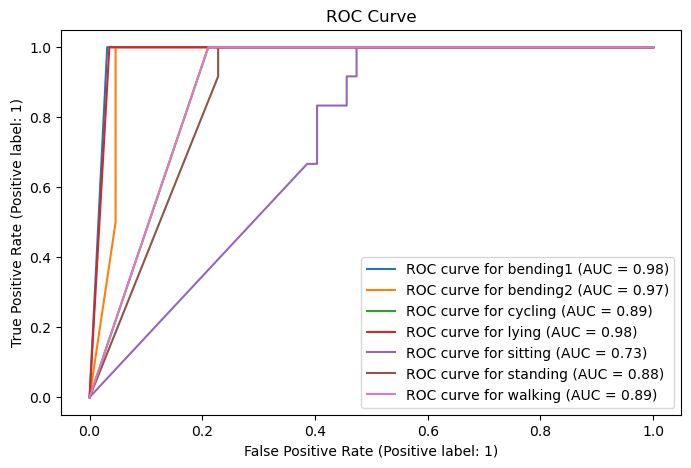

In [71]:
y_train_c_bin = label_binarize(y_train_c, classes=list(range(len(classes))))
ovr_nb = OneVsRestClassifier(nb).fit(X_train_c, y_train_c_bin)
y_pred_train_proba = ovr_nb.predict_proba(X_train_c)

fig, ax = plt.subplots(figsize=(8, 5))
for class_id in range(len(classes)):
    metrics.RocCurveDisplay.from_predictions(
        y_train_c_bin[:, class_id],
        y_pred_train_proba[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        ax=ax,
    )
ax.set_title('ROC Curve')
plt.show()

Accuracy: 0.737
Test Error: 0.263


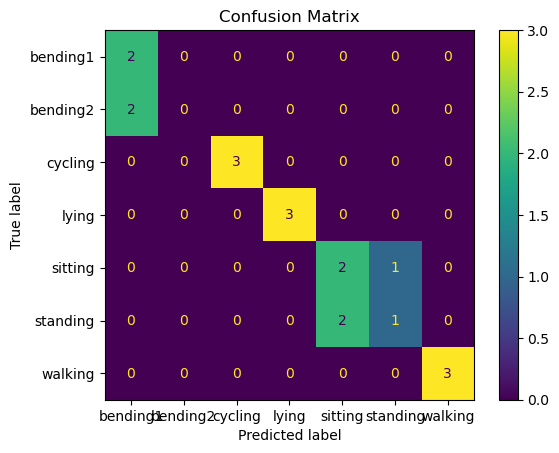

In [72]:
test_data_c = []
features_scatter = []
L = best_L_mnb
for f in test:
    activity = f.split(os.sep)[1]
    splits = get_splitted_data(f, L)
    row = []
    for split_num, split in enumerate(splits):
        stats = get_stats(split)
        for feature in features:
            dataFeaturesStats = stats[feature]
            for i in range(0, 6):
                if len(features_scatter)<len(features)*len(features_time_series)*L:
                    features_scatter.append(feature + '_Split' + str(split_num) +  '_' + COLUMN_NAMES[i+1])
                row.append(dataFeaturesStats[i])

    row.append(classes.index(activity))
    test_data_c.append(row)
features_scatter.append('label')
test_data_c = pd.DataFrame(test_data_c, columns=features_scatter)

X_test_c = test_data_c.drop('label', axis=1)
y_test_c = test_data_c['label']

y_pred_test = nb.predict(X_test_c)
acc =  metrics.accuracy_score(y_test_c, y_pred_test)
print('Accuracy: %.3f' % acc)
print('Test Error: %.3f' % (1-acc))

metrics.ConfusionMatrixDisplay.from_predictions(y_test_c, y_pred_test, display_labels=classes)
plt.title('Confusion Matrix')
plt.show()

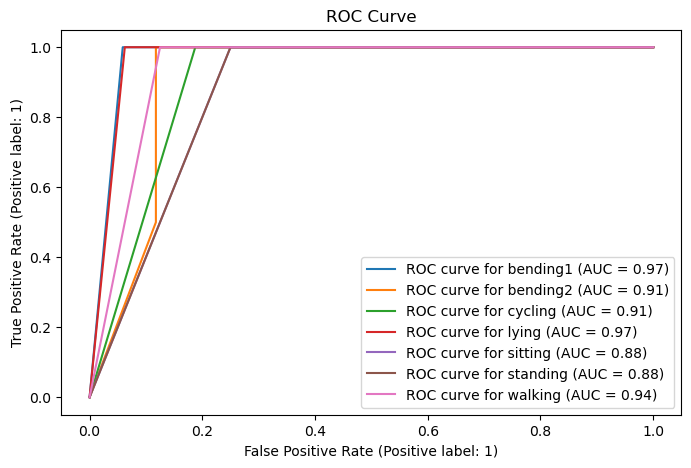

In [73]:
y_test_c_bin = label_binarize(y_test_c, classes=list(range(len(classes))))
y_pred_test_proba = ovr_nb.predict_proba(X_test_c)

fig, ax = plt.subplots(figsize=(8, 5))
for class_id in range(len(classes)):
    metrics.RocCurveDisplay.from_predictions(
        y_test_c_bin[:, class_id],
        y_pred_test_proba[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        ax=ax,
    )
ax.set_title('ROC Curve')
plt.show()

#### ii. Comparison

The Multinomial Naive Bayes Classifier outperforms both Gaussian Naive Bayes and Multiclass Logistic Regression in multi-class classification tasks, as evidenced by its better Area Under Curve (AUC) scores for each class.

## 3. ISLR 4.8.3

This problem relates to the QDA model, in which the observations
within each class are drawn from a normal distribution with a classspecific mean vector and a class specific covariance matrix. We consider the simple case where p = 1; i.e. there is only one feature.
Suppose that we have K classes, and that if an observation belongs
to the kth class then X comes from a one-dimensional normal distribution, X ∼ N(µk, σ2
k). Recall that the density function for the
one-dimensional normal distribution is given in (4.16). Prove that in
this case, the Bayes classifier is not linear. Argue that it is in fact
quadratic.
Hint: For this problem, you should follow the arguments laid out in
Section 4.4.1, but without making the assumption that σ2
1 = ... = σ2K.

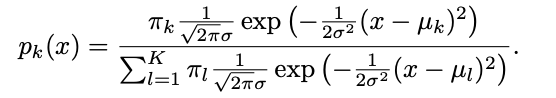

In [199]:
Image(filename='../data/AReM/image1.png')

The Bayes classifier involves assigning an observation
X = x to the class for which (4.17) is largest. Taking the log of (4.17) and
rearranging the terms

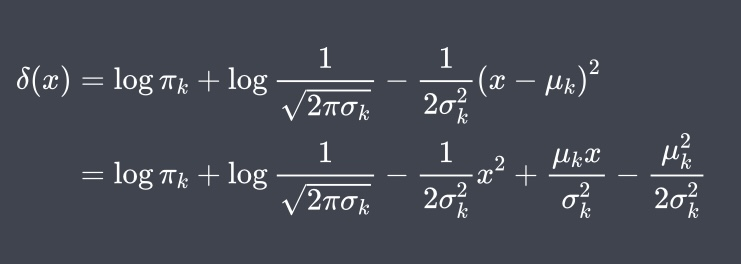

In [200]:
Image(filename='../data/AReM/image2.jpg')

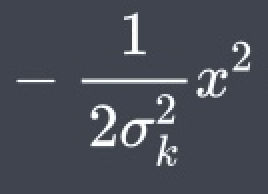

In [201]:
Image(filename='../data/AReM/image5.png')

since quadratic can not be ignored in this case, the Bayes classifier is not linear, it is in fact quadratic.

## 4. ISLR 4.8.7

Suppose that we wish to predict whether a given stock will issue a
dividend this year (“Yes” or “No”) based on X, last year’s percent
profit. We examine a large number of companies and discover that the
mean value of X for companies that issued a dividend was X¯ = 10,
while the mean for those that didn’t was X¯ = 0. In addition, the
variance of X for these two sets of companies was ˆσ2 = 36. Finally,
80 % of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue
a dividend this year given that its percentage profit was X = 4 last
year.
Hint: Recall that the density function for a normal random variable
is f(x) = √
1
2πσ2 e−(x−µ)2/2σ2
. You will need to use Bayes’ theorem.


Bayes’ theorem states that

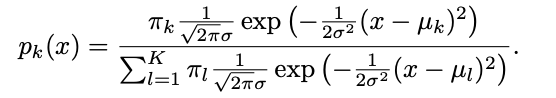

In [202]:
Image(filename='../data/AReM/image1.png')

where we assume that fk(x) is normal or Gaussian. In the one-normal
Gaussian dimensional setting, the normal density takes the form:

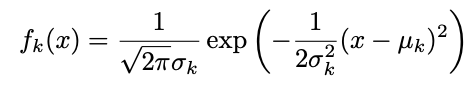

In [203]:
Image(filename='../data/AReM/image3.png')

since X=4,X¯ = 10,ˆσ2 = 36, 80 % of companies issued dividends, 20% don't

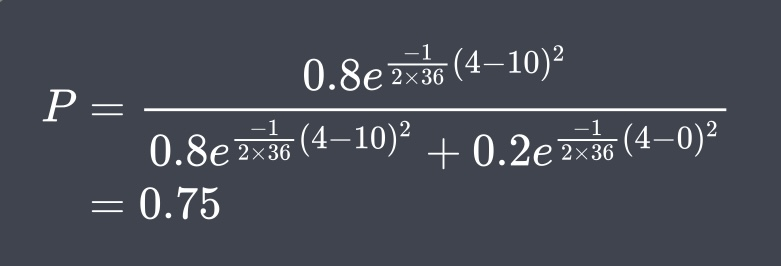

In [204]:
Image(filename='../data/AReM/image4.jpg')

## 5.1. Extra Practice ISLR 4.8.4

## 5.2. Extra Practice ISLR 4.8.9